# Milk Quality Prediction

# importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
import warnings
warnings.simplefilter("ignore")

# Read csv file

In [2]:
data=pd.read_csv("C:/Users/Me/Desktop/milknew.csv")

In [ ]:
 ##If Taste, Odor, Fat, and Turbidity are satisfied with optimal conditions then they will assign 1 otherwise 0.
##Temperature,colour and ph are given their actual values in the dataset.

In [3]:
data.head(4)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
0,6.6,35,1,0,1,0,254,high
1,6.6,36,0,1,0,1,253,high
2,8.5,70,1,1,1,1,246,low
3,9.5,34,1,1,0,1,255,low


In [4]:
data.tail(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour,Grade
1056,3.0,40,1,1,1,1,255,low
1057,6.8,43,1,0,1,0,250,high
1058,8.6,55,0,1,1,1,255,low


In [5]:
data.columns

Index(['pH', 'Temprature', 'Taste', 'Odor', 'Fat ', 'Turbidity', 'Colour',
       'Grade'],
      dtype='object')

In [6]:
data.shape

(1059, 8)

In [7]:
data.size

8472

In [8]:
data.dtypes

pH            float64
Temprature      int64
Taste           int64
Odor            int64
Fat             int64
Turbidity       int64
Colour          int64
Grade          object
dtype: object

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   pH          1059 non-null   float64
 1   Temprature  1059 non-null   int64  
 2   Taste       1059 non-null   int64  
 3   Odor        1059 non-null   int64  
 4   Fat         1059 non-null   int64  
 5   Turbidity   1059 non-null   int64  
 6   Colour      1059 non-null   int64  
 7   Grade       1059 non-null   object 
dtypes: float64(1), int64(6), object(1)
memory usage: 66.3+ KB


In [10]:
data.describe()

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
count,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000
mean,6.630123,44.226629,0.546742,0.432483,0.671388,0.491029,251.840415
std,1.399679,10.098364,0.498046,0.495655,0.469930,0.500156,4.307424
min,3.000000,34.000000,0.000000,0.000000,0.000000,0.000000,240.000000
25%,6.500000,38.000000,0.000000,0.000000,0.000000,0.000000,250.000000
50%,6.700000,41.000000,1.000000,0.000000,1.000000,0.000000,255.000000
75%,6.800000,45.000000,1.000000,1.000000,1.000000,1.000000,255.000000
max,9.500000,90.000000,1.000000,1.000000,1.000000,1.000000,255.000000


In [11]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

In [12]:
data.nunique()

pH            16
Temprature    17
Taste          2
Odor           2
Fat            2
Turbidity      2
Colour         9
Grade          3
dtype: int64

In [13]:
data["Grade"].unique()

array(['high', 'low', 'medium'], dtype=object)

In [14]:
data["Grade"].value_counts()

low       429
medium    374
high      256
Name: Grade, dtype: int64

# visuvalize the dataset 

Text(0.5, 1.0, 'Grade Based on pH')

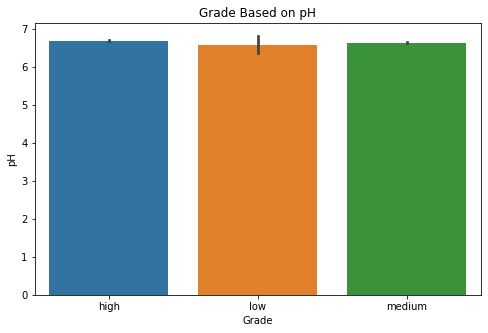

In [16]:
plt.figure(figsize=(8,5))
sns.barplot(data=data,x="Grade",y="pH")
plt.title("Grade Based on pH")

Text(0.5, 1.0, 'Grade Based on Temprature')

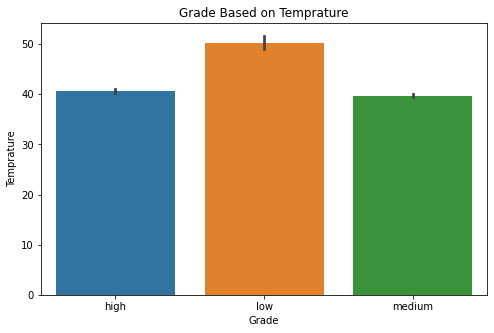

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=data,x="Grade",y="Temprature")
plt.title("Grade Based on Temprature")

Text(0.5, 1.0, 'Grade Based on Taste')

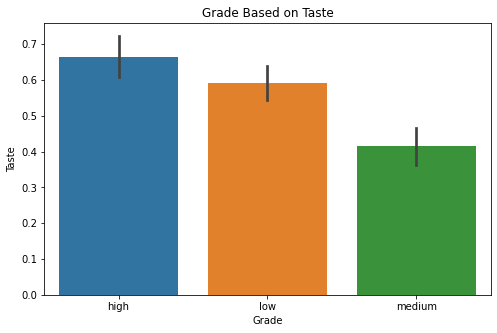

In [18]:
plt.figure(figsize=(8,5))
sns.barplot(data=data,x="Grade",y="Taste")
plt.title("Grade Based on Taste")

Text(0.5, 1.0, 'Grade Based on Odor')

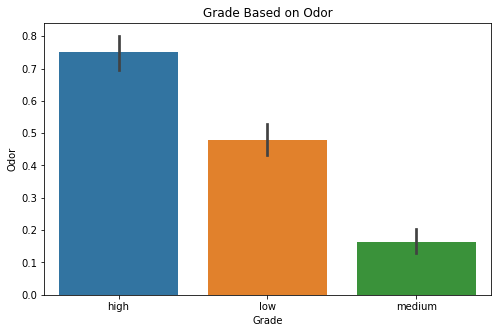

In [19]:
plt.figure(figsize=(8,5))
sns.barplot(data=data,x="Grade",y="Odor")
plt.title("Grade Based on Odor")

Text(0.5, 1.0, 'Grade Based on Turbidity')

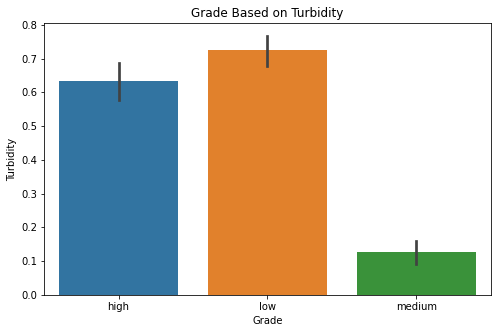

In [20]:
plt.figure(figsize=(8,5))
sns.barplot(data=data,x="Grade",y="Turbidity")
plt.title("Grade Based on Turbidity")

<AxesSubplot:>

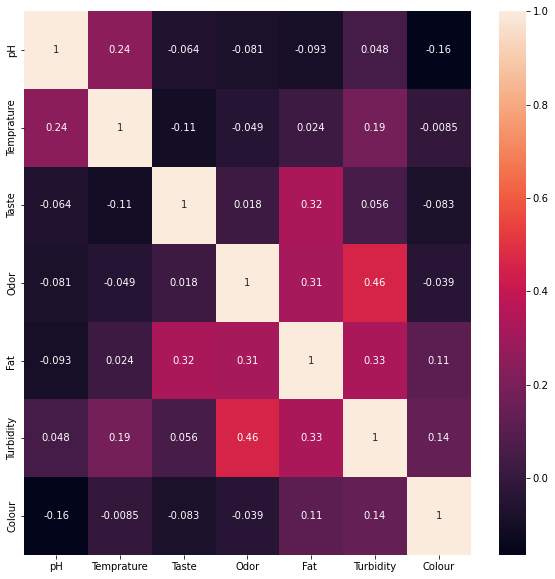

In [21]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

In [22]:
##Turbidity and Odor of the milk are highly correlated.

<AxesSubplot:title={'center':'Milk Quality'}>

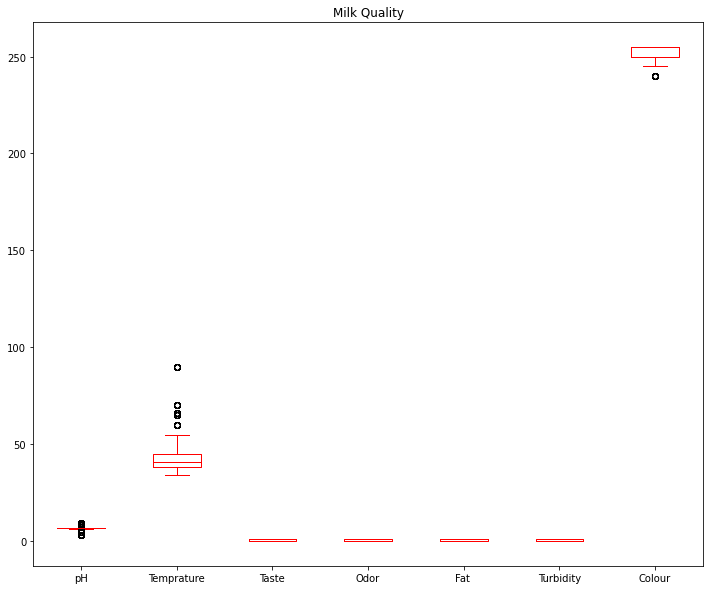

In [23]:
data.plot(kind="box",title="Milk Quality",color="red",figsize=(12,10))

<AxesSubplot:>

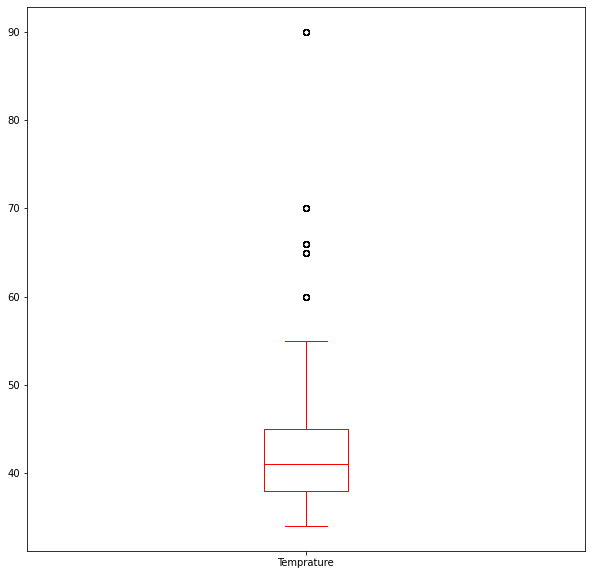

In [24]:
data.Temprature.plot(kind="box",figsize=(10,10),color="red")

In [25]:
data=data[data.Temprature<58]

<AxesSubplot:>

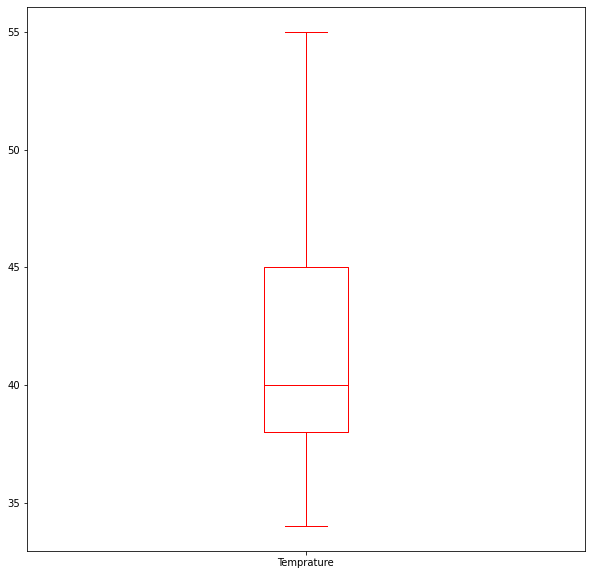

In [26]:
data.Temprature.plot(kind="box",figsize=(10,10),color="red")

In [27]:
data.isnull().sum()

pH            0
Temprature    0
Taste         0
Odor          0
Fat           0
Turbidity     0
Colour        0
Grade         0
dtype: int64

# split the data

In [28]:
x=data.drop("Grade",axis=1)
y=data.Grade

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=12)


In [30]:
x_train.head(3)

,pH,Temprature,Taste,Odor,Fat,Turbidity,Colour
191,6.8,45,0,0,1,0,255
47,6.8,45,1,1,1,0,245
680,9.0,43,1,0,1,1,250


In [31]:
y_train.head(3)

191    medium
47       high
680       low
Name: Grade, dtype: object

In [32]:
x_train.shape,y_train.shape

((669, 7), (669,))

In [33]:
x_test.shape,y_test.shape

((287, 7), (287,))

# LogisticRegression

In [34]:
log_model=LogisticRegression()

In [35]:
log_model.fit(x_train,y_train)

LogisticRegression()

In [36]:
logistic_pred=log_model.predict(x_test)

In [37]:
logistic_pred

array(['high', 'low', 'low', 'medium', 'low', 'medium', 'medium',
       'medium', 'medium', 'high', 'medium', 'low', 'medium', 'medium',
       'medium', 'high', 'medium', 'low', 'low', 'low', 'low', 'low',
       'high', 'medium', 'high', 'low', 'medium', 'medium', 'low',
       'medium', 'medium', 'high', 'medium', 'low', 'high', 'low',
       'medium', 'low', 'medium', 'medium', 'low', 'medium', 'low', 'low',
       'high', 'low', 'medium', 'low', 'high', 'medium', 'medium',
       'medium', 'low', 'low', 'medium', 'low', 'low', 'low', 'low',
       'medium', 'low', 'low', 'high', 'medium', 'medium', 'medium',
       'medium', 'low', 'medium', 'low', 'low', 'medium', 'high', 'low',
       'low', 'low', 'low', 'medium', 'medium', 'low', 'high', 'low',
       'low', 'high', 'low', 'medium', 'high', 'medium', 'medium',
       'medium', 'low', 'medium', 'high', 'high', 'low', 'medium',
       'medium', 'medium', 'medium', 'high', 'low', 'high', 'medium',
       'medium', 'low', 'high',

In [38]:
print("The accuracy of Logistic Regression: ",accuracy_score(y_test,logistic_pred))

The accuracy of Logistic Regression:  0.710801393728223


In [39]:
confusion_matrix(y_test,logistic_pred)

array([[ 36,  26,  10],
       [ 20,  68,   9],
       [  5,  13, 100]], dtype=int64)

# DecisionTree

In [40]:
DT_model=DecisionTreeClassifier()

In [41]:
DT_model.fit(x_train,y_train)

DecisionTreeClassifier()

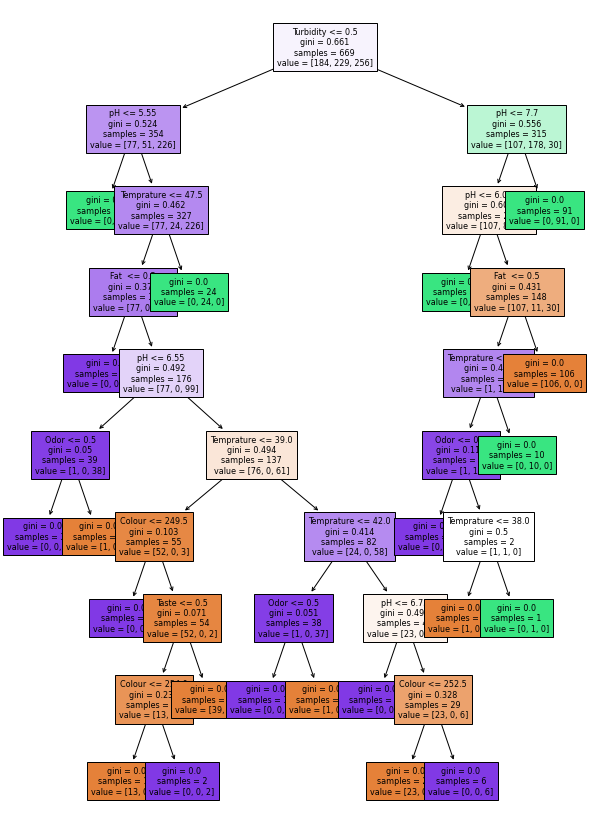

In [42]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,15))
decision_tree=plot_tree(decision_tree=DT_model,feature_names=x.columns,fontsize=8,filled=True)

In [43]:
DT_pred=DT_model.predict(x_test)

In [44]:
DT_pred

array(['high', 'high', 'low', 'medium', 'low', 'medium', 'low', 'medium',
       'low', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',
       'high', 'high', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'low', 'high', 'high', 'medium',
       'low', 'medium', 'medium', 'low', 'medium', 'low', 'low', 'high',
       'low', 'medium', 'low', 'high', 'medium', 'medium', 'medium',
       'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'medium',
       'low', 'low', 'high', 'medium', 'medium', 'medium', 'high', 'low',
       'medium', 'low', 'low', 'medium', 'high', 'low', 'low', 'low',
       'medium', 'medium', 'medium', 'high', 'low', 'high', 'low', 'low',
       'low', 'medium', 'high', 'medium', 'medium', 'medium', 'high',
       'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium',
       'low', 'high', 'low', 'low', 'medium', 'low', 'low', 'high', 'l

In [45]:
print("The accuracy of Decision Tree: ",accuracy_score(y_test,DT_pred))

The accuracy of Decision Tree:  0.9930313588850174


In [46]:
confusion_matrix(y_test,DT_pred)

array([[ 72,   0,   0],
       [  2,  95,   0],
       [  0,   0, 118]], dtype=int64)

# KNNeighbour

In [47]:
knn_model=KNeighborsClassifier(15)

In [48]:
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=15)

In [49]:
knn_pred=knn_model.predict(x_test)

In [50]:
knn_pred

array(['medium', 'high', 'low', 'medium', 'low', 'medium', 'low',
       'medium', 'low', 'high', 'medium', 'high', 'medium', 'medium',
       'medium', 'high', 'medium', 'low', 'high', 'low', 'low', 'medium',
       'low', 'medium', 'low', 'low', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'low', 'high', 'high',
       'medium', 'low', 'medium', 'medium', 'low', 'medium', 'medium',
       'low', 'high', 'low', 'medium', 'low', 'medium', 'medium',
       'medium', 'medium', 'high', 'low', 'medium', 'low', 'low', 'low',
       'low', 'medium', 'low', 'low', 'high', 'medium', 'medium',
       'medium', 'high', 'low', 'medium', 'low', 'low', 'medium', 'high',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'high',
       'low', 'high', 'low', 'low', 'low', 'medium', 'high', 'medium',
       'medium', 'medium', 'high', 'medium', 'high', 'medium', 'low',
       'medium', 'medium', 'medium', 'low', 'high', 'low', 'low',
       'medium', 'low', 'l

In [51]:
print("The accuracy of KNNeighbour: ",accuracy_score(y_test,knn_pred))

The accuracy of KNNeighbour:  0.9442508710801394


In [52]:
confusion_matrix(y_test,knn_pred)

array([[ 67,   0,   5],
       [  0,  91,   6],
       [  5,   0, 113]], dtype=int64)

# Navie Bayes

In [53]:
model_nb=GaussianNB()

In [54]:
model_nb.fit(x_train,y_train)

GaussianNB()

In [55]:
nb_pred=model_nb.predict(x_test)

In [56]:
nb_pred

array(['high', 'high', 'low', 'medium', 'low', 'medium', 'low', 'medium',
       'medium', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',
       'high', 'high', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'high', 'medium', 'low', 'high', 'high', 'medium', 'low',
       'high', 'medium', 'low', 'medium', 'high', 'low', 'high', 'low',
       'medium', 'low', 'high', 'medium', 'medium', 'medium', 'high',
       'low', 'medium', 'low', 'low', 'low', 'low', 'medium', 'low',
       'low', 'high', 'medium', 'medium', 'medium', 'high', 'low',
       'medium', 'low', 'low', 'medium', 'high', 'high', 'low', 'low',
       'low', 'medium', 'medium', 'high', 'low', 'high', 'low', 'low',
       'low', 'medium', 'high', 'medium', 'medium', 'medium', 'high',
       'medium', 'high', 'high', 'low', 'medium', 'medium', 'medium',
       'low', 'high', 'low', 'low', 'medium', 'medium', 'low', 'high',
   

In [57]:
print("The accuracy of Naive Bayes: ",accuracy_score(y_test,nb_pred))

The accuracy of Naive Bayes:  0.9233449477351916


In [58]:
confusion_matrix(y_test,nb_pred)

array([[ 72,   0,   0],
       [  8,  86,   3],
       [ 10,   1, 107]], dtype=int64)

# SVC(Support Vector Classifier)

In [59]:
model_svc=SVC()

In [60]:
model_svc.fit(x_train,y_train)

SVC()

In [61]:
svc_pred=model_svc.predict(x_test)

In [62]:
svc_pred

array(['medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'medium', 'medium', 'medi

In [63]:
print("The accuracy of SVC :",accuracy_score(y_test,svc_pred))

The accuracy of SVC : 0.41114982578397213


In [64]:
confusion_matrix(y_test,svc_pred)

array([[  0,   0,  72],
       [  0,   0,  97],
       [  0,   0, 118]], dtype=int64)

# Random Forest

In [65]:
RF_model=RandomForestClassifier()

In [66]:
RF_model.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
RF_pred=RF_model.predict(x_test)

In [68]:
RF_pred

array(['high', 'high', 'low', 'medium', 'low', 'medium', 'low', 'medium',
       'low', 'high', 'medium', 'medium', 'medium', 'medium', 'medium',
       'high', 'high', 'low', 'medium', 'low', 'low', 'medium', 'low',
       'medium', 'low', 'low', 'medium', 'medium', 'medium', 'medium',
       'medium', 'medium', 'medium', 'low', 'high', 'high', 'medium',
       'low', 'medium', 'medium', 'low', 'medium', 'low', 'low', 'high',
       'low', 'medium', 'low', 'high', 'medium', 'medium', 'medium',
       'high', 'low', 'medium', 'low', 'low', 'low', 'low', 'medium',
       'low', 'low', 'high', 'medium', 'medium', 'medium', 'high', 'low',
       'medium', 'low', 'low', 'medium', 'high', 'low', 'low', 'low',
       'medium', 'medium', 'medium', 'high', 'low', 'high', 'low', 'low',
       'low', 'medium', 'high', 'medium', 'medium', 'medium', 'high',
       'medium', 'high', 'medium', 'low', 'medium', 'medium', 'medium',
       'low', 'high', 'low', 'low', 'medium', 'low', 'low', 'high', 'l

In [69]:
print("The Accuracy of RandomForest:",accuracy_score(y_test,RF_pred))

The Accuracy of RandomForest: 0.9930313588850174


In [70]:
confusion_matrix(y_test,RF_pred)

array([[ 72,   0,   0],
       [  2,  95,   0],
       [  0,   0, 118]], dtype=int64)

# find the quality of the milk for the input data

In [71]:
pH=input("Enter the pH value: ")##input the value within 3-9.5 
Temprature=input("Enter the Temprature value: ")##34-55
Taste=input("Enter the taste value: ")## 0 or 1
Odor=input("Enter the odor value:")## 0 or 1
Fat=input("Enter the fat value: ")## 0 or 1
Turbidity=input("Enter the turbidity value: ") ##0 or 1
Colour=input("Enter the colour: ")## 240-255
Grade=RF_model.predict([[pH,Temprature,Taste,Odor,Fat,Turbidity,Colour]])
if Grade=="high":
    print("The quality of the milk is high")
elif Grade=="medium":
    print("The quality of the milk is medium level")
else:
    print("The quality of the milk is bad")

Enter the pH value: 4.5
Enter the Temprature value: 36
Enter the taste value: 1
Enter the odor value:0
Enter the fat value: 1
Enter the turbidity value: 1
Enter the colour: 245
The quality of the milk is bad
